In [1]:
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
_dirs = os.listdir('Grouped_select')
print(_dirs)

['16_17_Shale', '10_bioturbated_mudstone-wakestone', '.DS_Store', '5_splotchy_packestone-grainstone', 'notes.txt', '4_skeletal_grainstone', '13_14_spiculitic_mudstone-wackestone', '6_bedded_skeletal_peloidal_packstone-grainstone', '2_chert_breccia', '1_chert_breccia_in_greenis_shale_matrix', '7_nodular_packstone-grainstone', '9_bioturbated_skeletal_peloidal_packstone-grainstone', '3_skeletal_mudstone-wackestone']


In [3]:
_dirs.remove('notes.txt')
_dirs.remove('.DS_Store')
print(_dirs)

['16_17_Shale', '10_bioturbated_mudstone-wakestone', '5_splotchy_packestone-grainstone', '4_skeletal_grainstone', '13_14_spiculitic_mudstone-wackestone', '6_bedded_skeletal_peloidal_packstone-grainstone', '2_chert_breccia', '1_chert_breccia_in_greenis_shale_matrix', '7_nodular_packstone-grainstone', '9_bioturbated_skeletal_peloidal_packstone-grainstone', '3_skeletal_mudstone-wackestone']


In [4]:
from PIL import Image 
import glob

In [5]:
label = 0
images = []
labels = []
names = []
for folder in _dirs: 
    PATH = 'Grouped_select/' + folder
    print(PATH)
    names.append(''.join(filter(str.isalpha, folder)))
    for filename in glob.glob(PATH + '/*jpg'):
        images.append(io.imread(filename))
        labels.append(label)
    label+=1
        
        
    

Grouped_select/16_17_Shale
Grouped_select/10_bioturbated_mudstone-wakestone
Grouped_select/5_splotchy_packestone-grainstone
Grouped_select/4_skeletal_grainstone
Grouped_select/13_14_spiculitic_mudstone-wackestone
Grouped_select/6_bedded_skeletal_peloidal_packstone-grainstone
Grouped_select/2_chert_breccia
Grouped_select/1_chert_breccia_in_greenis_shale_matrix
Grouped_select/7_nodular_packstone-grainstone
Grouped_select/9_bioturbated_skeletal_peloidal_packstone-grainstone
Grouped_select/3_skeletal_mudstone-wackestone


In [8]:
names

['Shale',
 'bioturbatedmudstonewakestone',
 'splotchypackestonegrainstone',
 'skeletalgrainstone',
 'spiculiticmudstonewackestone',
 'beddedskeletalpeloidalpackstonegrainstone',
 'chertbreccia',
 'chertbrecciaingreenisshalematrix',
 'nodularpackstonegrainstone',
 'bioturbatedskeletalpeloidalpackstonegrainstone',
 'skeletalmudstonewackestone']

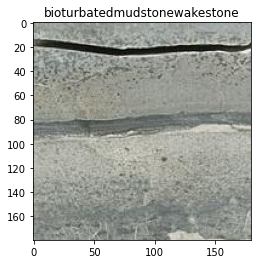

In [9]:
plt.imshow(images[999])
plt.title(names[labels[999]])
plt.show()

In [6]:
import tensorflow.compat.v2 as tf
#import tensorflow_datasets as tfds

tf.enable_v2_behavior()

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')

In [7]:
import time
from tensorflow.compat.v2.keras import models,layers

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_images,test_images,train_y,test_y = train_test_split(images, labels, test_size=0.2, shuffle=True)

In [10]:
del images

In [11]:
train_arr = np.array(train_images)/255
test_arr  = np.array(test_images)/255

In [13]:
del train_images
del test_images

NameError: name 'train_images' is not defined

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_arr, train_y,batch_size=25,epochs=10, 
                    validation_data=(test_arr, test_y),verbose=True)


Train on 6084 samples, validate on 1522 samples
Epoch 1/10
6084/6084 [==============================] - ETA: 0s - loss: 1.3110 - accuracy: 0.6198

/Users/austinwright/miniforge3/envs/tf_env1./lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


6084/6084 [==============================] - 36s 6ms/sample - loss: 1.3110 - accuracy: 0.6198 - val_loss: 0.8298 - val_accuracy: 0.7057
Epoch 2/10
6084/6084 [==============================] - 35s 6ms/sample - loss: 0.8419 - accuracy: 0.7178 - val_loss: 0.7728 - val_accuracy: 0.7300
Epoch 3/10
6084/6084 [==============================] - 35s 6ms/sample - loss: 0.7753 - accuracy: 0.7344 - val_loss: 0.7775 - val_accuracy: 0.7201
Epoch 4/10
6084/6084 [==============================] - 36s 6ms/sample - loss: 0.7435 - accuracy: 0.7461 - val_loss: 0.6967 - val_accuracy: 0.7490
Epoch 5/10
6084/6084 [==============================] - 36s 6ms/sample - loss: 0.7073 - accuracy: 0.7620 - val_loss: 0.8736 - val_accuracy: 0.7148
Epoch 6/10
6084/6084 [==============================] - 37s 6ms/sample - loss: 0.6424 - accuracy: 0.7844 - val_loss: 0.8218 - val_accuracy: 0.7451
Epoch 7/10
6084/6084 [==============================] - 36s 6ms/sample - loss: 0.5239 - accuracy: 0.8246 - val_loss: 0.6003 - val

In [15]:
history = model.fit(train_arr, train_y,batch_size=25,epochs=10, 
                    validation_data=(test_arr, test_y),verbose=True)


Train on 6084 samples, validate on 1522 samples
Epoch 1/10
6084/6084 [==============================] - 37s 6ms/sample - loss: 0.2587 - accuracy: 0.9162 - val_loss: 0.8229 - val_accuracy: 0.7707
Epoch 2/10
6084/6084 [==============================] - 41s 7ms/sample - loss: 0.2455 - accuracy: 0.9180 - val_loss: 0.8639 - val_accuracy: 0.7943
Epoch 3/10
6084/6084 [==============================] - 44s 7ms/sample - loss: 0.1596 - accuracy: 0.9482 - val_loss: 1.1777 - val_accuracy: 0.7503
Epoch 4/10
6084/6084 [==============================] - 43s 7ms/sample - loss: 0.2189 - accuracy: 0.9265 - val_loss: 1.0359 - val_accuracy: 0.7543
Epoch 5/10
6084/6084 [==============================] - 37s 6ms/sample - loss: 0.1483 - accuracy: 0.9500 - val_loss: 1.1501 - val_accuracy: 0.7503
Epoch 6/10
6084/6084 [==============================] - 36s 6ms/sample - loss: 0.1083 - accuracy: 0.9610 - val_loss: 1.1363 - val_accuracy: 0.7845
Epoch 7/10
6084/6084 [==============================] - 36s 6ms/sample